In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# Deleting the unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Renaming the current columns
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
## Check for duplicate values
df.duplicated().sum()

403

In [13]:
## Removing duplicated values
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df_ham = df[df['Label']=='ham'].sample(17)
df_ham

,Label,Text
3160,ham,Mystery solved! Just opened my email and he's ...
4387,ham,"see you then, we're all christmassy here!"
5047,ham,Yeah so basically any time next week you can g...
3410,ham,Only once then after ill obey all yours.
1547,ham,Bishan lar nearer... No need buy so early cos ...
3377,ham,Hows that watch resizing
5001,ham,You still around? Looking to pick up later
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
989,ham,Ugh. Gotta drive back to sd from la. My butt i...
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"


In [16]:
df_ham

,Label,Text
3160,ham,Mystery solved! Just opened my email and he's ...
4387,ham,"see you then, we're all christmassy here!"
5047,ham,Yeah so basically any time next week you can g...
3410,ham,Only once then after ill obey all yours.
1547,ham,Bishan lar nearer... No need buy so early cos ...
3377,ham,Hows that watch resizing
5001,ham,You still around? Looking to pick up later
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
989,ham,Ugh. Gotta drive back to sd from la. My butt i...
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"


In [17]:
df_spam = df[df['Label'] == 'spam'].sample(15)
df_spam

,Label,Text
1662,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...
2685,spam,URGENT! We are trying to contact U. Todays dra...
4894,spam,Want the latest Video handset? 750 anytime any...
2589,spam,Join the UK's horniest Dogging service and u c...
4071,spam,Loans for any purpose even if you have Bad Cre...
3441,spam,Save money on wedding lingerie at www.bridal.p...
226,spam,Will u meet ur dream partner soon? Is ur caree...
2769,spam,Burger King - Wanna play footy at a top stadiu...
239,spam,U 447801259231 have a secret admirer who is lo...
367,spam,Here is your discount code RP176781. To stop f...


In [18]:
df_spam

,Label,Text
1662,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...
2685,spam,URGENT! We are trying to contact U. Todays dra...
4894,spam,Want the latest Video handset? 750 anytime any...
2589,spam,Join the UK's horniest Dogging service and u c...
4071,spam,Loans for any purpose even if you have Bad Cre...
3441,spam,Save money on wedding lingerie at www.bridal.p...
226,spam,Will u meet ur dream partner soon? Is ur caree...
2769,spam,Burger King - Wanna play footy at a top stadiu...
239,spam,U 447801259231 have a secret admirer who is lo...
367,spam,Here is your discount code RP176781. To stop f...


In [19]:
data = pd.concat([df_ham, df_spam], axis=0)

In [20]:
data

,Label,Text
3160,ham,Mystery solved! Just opened my email and he's ...
4387,ham,"see you then, we're all christmassy here!"
5047,ham,Yeah so basically any time next week you can g...
3410,ham,Only once then after ill obey all yours.
1547,ham,Bishan lar nearer... No need buy so early cos ...
3377,ham,Hows that watch resizing
5001,ham,You still around? Looking to pick up later
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
989,ham,Ugh. Gotta drive back to sd from la. My butt i...
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"


In [21]:
data.shape

(32, 2)

In [22]:
data_sample = data.sample(30)
data_sample

,Label,Text
2479,spam,Sppok up ur mob with a Halloween collection of...
4894,spam,Want the latest Video handset? 750 anytime any...
1004,ham,Umma. Did she say anything
133,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
2972,ham,Happy New Year Princess!
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"
226,spam,Will u meet ur dream partner soon? Is ur caree...
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
2589,spam,Join the UK's horniest Dogging service and u c...
239,spam,U 447801259231 have a secret admirer who is lo...


In [23]:
data_sample.shape

(30, 2)

In [27]:
data_sample.rename(index = {2479:0, 4894:1, 1004:2, 133:3}, inplace=True)

In [30]:
data_sample.rename(index = {2972:4, 3851:5, 226:6, 4702:7, 2589:8, 239:9, 2769:10, 284:11,
                           1555:12, 5339:13, 3377:14, 367:15, 5047:17, 3160:18, 1805:19, 1206:20,
                           989:21, 5001:22, 24:23, 1662:24, 3292:25, 2685:26, 3410:27, 3441:28, 1547:29}, inplace=True)

In [31]:
data_sample

,Label,Text
0,spam,Sppok up ur mob with a Halloween collection of...
1,spam,Want the latest Video handset? 750 anytime any...
2,ham,Umma. Did she say anything
3,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4,ham,Happy New Year Princess!
5,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"
6,spam,Will u meet ur dream partner soon? Is ur caree...
7,ham,Mmmmmmm *snuggles into you* ...*deep contented...
8,spam,Join the UK's horniest Dogging service and u c...
9,spam,U 447801259231 have a secret admirer who is lo...


In [33]:
data_sample.shape

(30, 2)

In [35]:
data_sample['Label'].value_counts()

ham     16
spam    14
Name: Label, dtype: int64

In [36]:
data_sample.to_csv(r'data.csv', index=False)

In [11]:
df['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [12]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [13]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [14]:
## Converting Label column into Numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Label'] = encoder.fit_transform(df['Label'])

In [16]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.shape

(5169, 2)

## 2. EDA

In [21]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['Label'].value_counts()

0    4516
1     653
Name: Label, dtype: int64

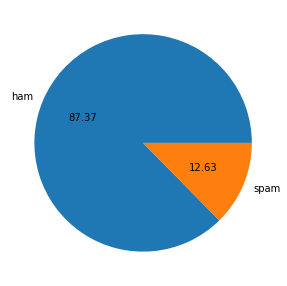

In [23]:
plt.figure(figsize=(10,5))
plt.pie(df['Label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [24]:
## Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Muhammad Hamza
[nltk_data]     Abid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
## Creating new column representing Number of Characters of a document
df['Num_Characters'] = df['Text'].apply(len)

In [28]:
df.head()

,Label,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
## Creating new column representing Number of words of a document
df['Num_Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,Label,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
## Creating new column representing Number of sentence of a document
df['Num_Sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,Label,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
## For ham messages
df[df['Label'] == 0][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
## For spam messages
df[df['Label'] == 1][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='Num_Characters', ylabel='Count'>

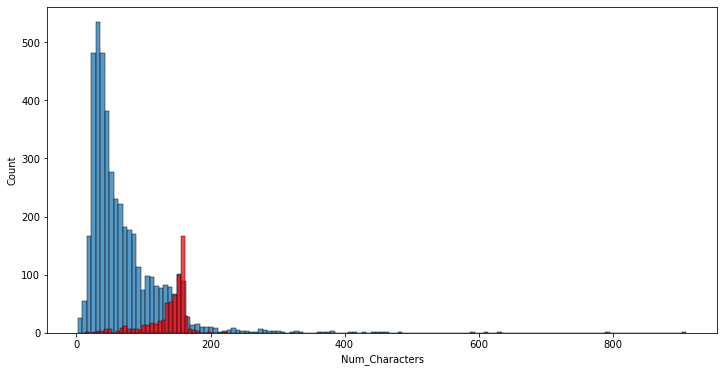

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label']==0]['Num_Characters'])
sns.histplot(df[df['Label']==1]['Num_Characters'], color='red')

<AxesSubplot:xlabel='Num_Words', ylabel='Count'>

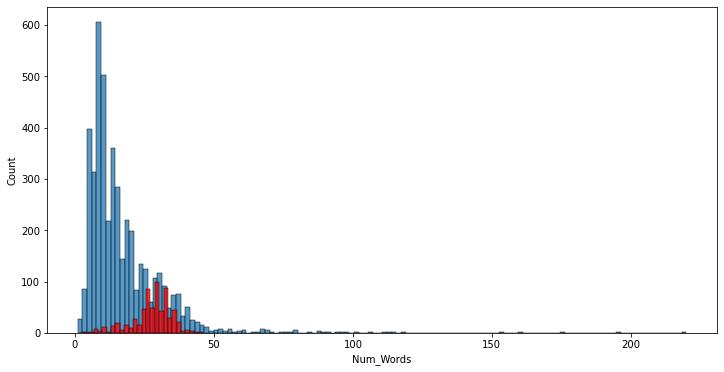

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label']==0]['Num_Words'])
sns.histplot(df[df['Label']==1]['Num_Words'], color='red')

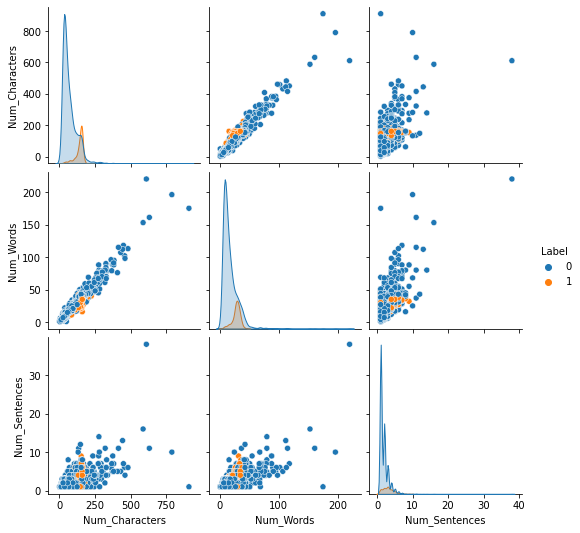

In [38]:
sns.pairplot(df, hue='Label')

In [39]:
df.corr()

,Label,Num_Characters,Num_Words,Num_Sentences
Label,1.000000,0.384717,0.262969,0.267602
Num_Characters,0.384717,1.000000,0.965784,0.626118
Num_Words,0.262969,0.965784,1.000000,0.680882
Num_Sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

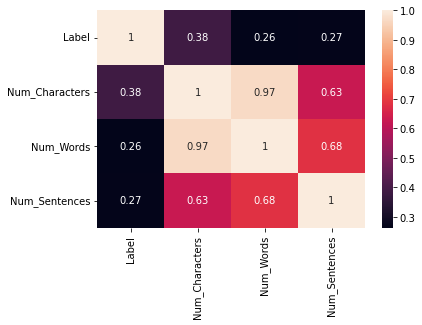

In [40]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing

In [41]:
#### 1. Lower case
#### 2. Tokenization
#### 3. Removing Special Characters
#### 4. Removing Stop Words and Punctuation
#### 5. Stemming

In [42]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package bas

[nltk_data]    |   Package masc_tagged is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to C:\Users\Muhammad
[nltk_data]    |     Hamza Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading pa

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\Muhammad
[nltk_data]    |     Hamza Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\Muhammad
[nltk_data]    |     Hamza Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\Muhammad Hamza
[nltk_data]    |     Abid\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up

True

In [44]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
## Creating new columns of Transformed Text
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [50]:
df.head()

,Label,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
!pip install wordcloud

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [59]:
spam_wc = wc.generate(df[df['Label']==1]['Transformed_Text'].str.cat(sep=' '))

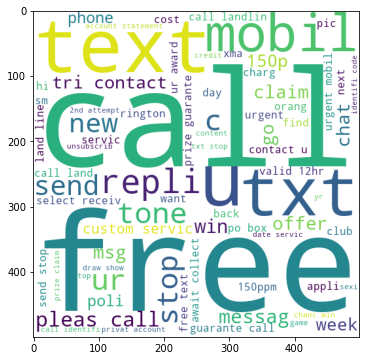

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [62]:
ham_wc = wc.generate(df[df['Label']==0]['Transformed_Text'].str.cat(sep=' '))

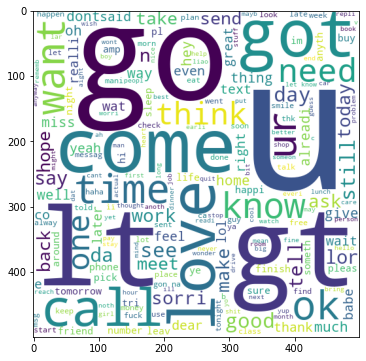

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [64]:
df.head()

,Label,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
spam_corpus = []
for msg in df[df['Label']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

9939

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


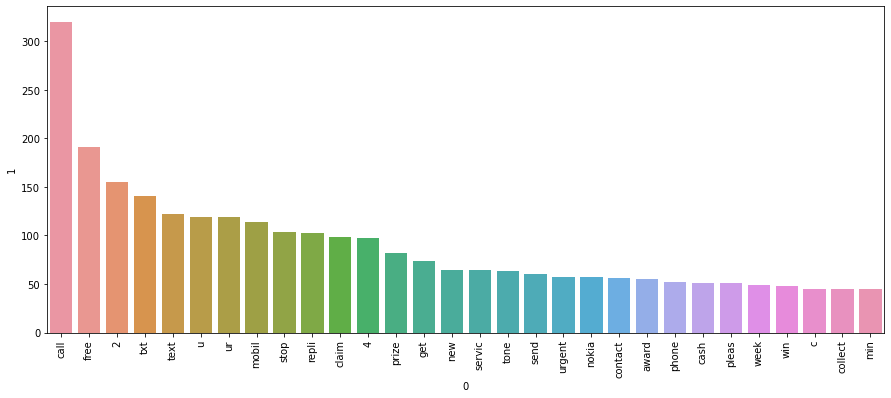

In [78]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [79]:
ham_corpus = []
for msg in df[df['Label']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [80]:
len(ham_corpus)

35402

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


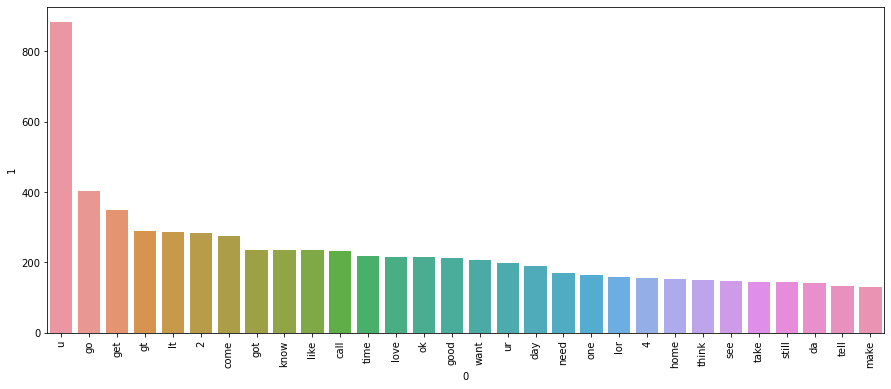

In [81]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [84]:
X = cv.fit_transform(df['Transformed_Text']).toarray()

In [86]:
X.shape

(5169, 6708)

In [89]:
y = df['Label'].values

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('RF', classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

RF               precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

[[792 104]
 [ 20 118]]


In [100]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('RF', classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

RF               precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034

[[871  25]
 [ 12 126]]


In [101]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('RF', classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

RF               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[893   3]
 [ 28 110]]


In [103]:
X_tfidf = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [104]:
X_tfidf.shape

(5169, 6708)

In [108]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.2, random_state=2)

In [109]:
gnb.fit(X_tfidf_train, y_train)
y_pred4 = gnb.predict(X_tfidf_test)
print('RF', classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred1))

RF               precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034

[[792 104]
 [ 20 118]]


In [110]:
mnb.fit(X_tfidf_train, y_train)
y_pred5 = mnb.predict(X_tfidf_test)
print('RF', classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

RF               precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

[[896   0]
 [ 42  96]]


In [112]:
bnb.fit(X_tfidf_train, y_train)
y_pred6 = bnb.predict(X_tfidf_test)
print('RF', classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))

RF               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[893   3]
 [ 28 110]]


In [113]:
## We choose tfidf and MNB